# Predicting Store Performance  
This note book looks into using various Python-based machine learning and data science libraries 
in an attenpt to Develop a machine learning model that will identify whether stores will perform
well or poorly.

we're going to take the following steps 
1. Problem definition
2. Data dictionary 
3. Data preparation
4. Building model
5. Experimentation 
6. Evaluation 
7. communication





## 1. Problem Definition 
 Task:
> To develop logistic regression, decision tree and neural network models that will identify
whether stores will perform well or poorly.


## 2. Data dictionary
content:

* Variable ---------------------------Description


* Town -------------------------------Name of town where the store is located
* Store ID ---------------------------Unique ID for the store
* Manager name -----------------------Name (fictional) of the store manager
* Staff numbers ----------------------Number of staff employed
*  Floor Space and Window Space -------Floor area and window area of the store
* Car park (yes or no) ---------------Does the store have a car park?
* Demographic score ------------------How well does the demographic of the local
                                    population match the ideal demographic of
                                    the store? Higher is better
* Location (Shopping Centre, High
  Street, Retail Park)----------------Type of location for the store 40 min, 30 min, 20 min and 10 min
* drive time population size----------The population within each of the different drive time distances
* Store age --------------------------The age of the store in years
* Clearance space in store -----------How much of the store’s floor space is given over to discounted clearance stock
* Competition number -----------------How many competing stores are near the store
* Competition score ------------------A measure of quality of the competing stores. High = high competition
* Performance ------------------------Good or bad. An assessment of how well the store is performing

## Preparing the tools

we're going to use matplot, numpy and pandas for data analysis and manipulation

In [188]:
# Import all the tools we need 

# Regular EDA (exploratory data analyssis) and plotting lbraries
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#we want our plots to appear inside the notebook
%matplotlib inline 

# Models from Scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neural_network import MLPClassifier

# Model Evaluations 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV,  cross_val_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score,plot_roc_curve,accuracy_score


## 3. Data Preparantion/wrangling 

In [4]:
## Data Wrangling 

def wrangle(filepath):
    #read csv file into a dataframe
    df = pd.read_csv(filepath)
    #return df 
    return df

In [148]:
# load data
df = wrangle("data/storedata.csv")
print("df shape:", df.shape)
df.head()

df shape: (136, 19)


,Town,Country,Store ID,Manager name,Staff,Floor Space,Window,Car park,Demographic score,Location,40min population,30 min population,20 min population,10 min population,Store age,Clearance space,Competition number,Competition score,Performance
0,Swinton (Greater Manchester),UK,1437,Roger,9,18526,121,Yes,10,Retail Park,1288374,1138224,1006986,1002340,3,238,16,16,Good
1,Stamford,UK,1544,Ella,8,18569,121,Yes,11,Shopping Centre,1086225,1015321,1012182,1008436,4,384,15,19,Good
2,Skipton,UK,2039,Valentina,-2,12288,105,No,12,Retail Park,1595638,1281661,1104490,1011395,11,219,13,18,Bad
3,Stratton,UK,2055,Antonia,7,17092,117,No,14,High Street,1179395,1022959,1009496,1002169,5,261,15,12,Bad
4,Shepperton,UK,2141,Gabriel,7,11307,103,No,18,Retail Park,1398558,1085170,1003137,1002513,7,200,19,13,Bad


#### Exploratory Data Analysis

In [149]:
# location Counts in Dataset
location_counts = df["Location"].value_counts()
location_counts

Shopping Centre    52
Retail Park        43
High Street        40
Village             1
Name: Location, dtype: int64

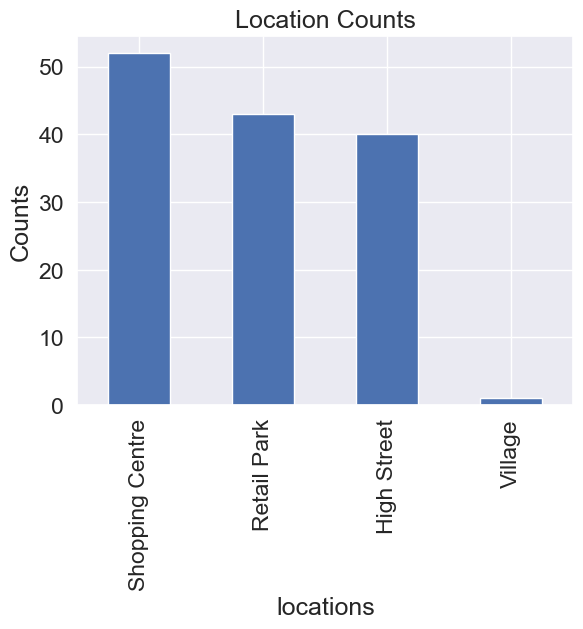

In [150]:
# Visualizing top locations
location_counts.plot(
    kind = "bar",
    xlabel = "locations",
    ylabel = "Counts",
    title = "Location Counts"

);

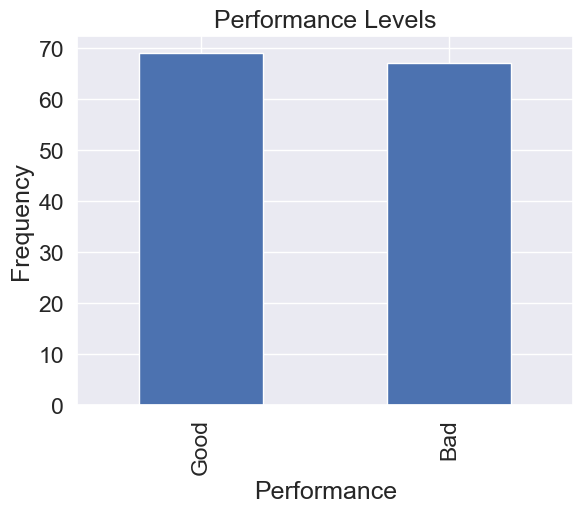

In [159]:
# Visualizing Performance (target)
mask = df["Performance"]
mask.value_counts().plot(
    kind="bar",
    xlabel = "Performance",
    ylabel = "Frequency",
    title = "Performance Levels"
);

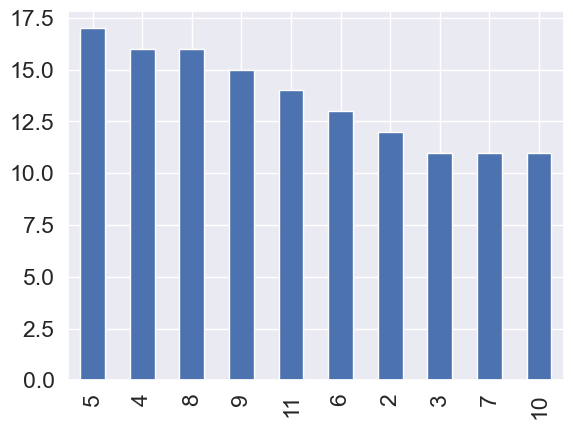

In [157]:
df["Store age"].value_counts().plot(kind = "bar");

In [10]:
df["Manager name"].nunique()

118

In [11]:
df.head()

,Town,Country,Store ID,Manager name,Staff,Floor Space,Window,Car park,Demographic score,Location,40min population,30 min population,20 min population,10 min population,Store age,Clearance space,Competition number,Competition score,Performance
0,Swinton (Greater Manchester),UK,1437,Roger,9,18526,121,Yes,10,Retail Park,1288374,1138224,1006986,1002340,3,238,16,16,Good
1,Stamford,UK,1544,Ella,8,18569,121,Yes,11,Shopping Centre,1086225,1015321,1012182,1008436,4,384,15,19,Good
2,Skipton,UK,2039,Valentina,-2,12288,105,No,12,Retail Park,1595638,1281661,1104490,1011395,11,219,13,18,Bad
3,Stratton,UK,2055,Antonia,7,17092,117,No,14,High Street,1179395,1022959,1009496,1002169,5,261,15,12,Bad
4,Shepperton,UK,2141,Gabriel,7,11307,103,No,18,Retail Park,1398558,1085170,1003137,1002513,7,200,19,13,Bad


In [12]:
# This will turn all of the string values into category values
for label, content in df.items():
    if pd.api.types.is_string_dtype(content):
        df[label] = content.astype("category").cat.as_ordered()

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136 entries, 0 to 135
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Town                136 non-null    category
 1   Country             136 non-null    category
 2   Store ID            136 non-null    int64   
 3   Manager name        136 non-null    category
 4   Staff               136 non-null    int64   
 5   Floor Space         136 non-null    int64   
 6   Window              136 non-null    int64   
 7   Car park            136 non-null    category
 8   Demographic score   136 non-null    int64   
 9   Location            136 non-null    category
 10  40min population    136 non-null    int64   
 11  30 min population   136 non-null    int64   
 12  20 min population   136 non-null    int64   
 13  10 min population   136 non-null    int64   
 14  Store age           136 non-null    int64   
 15  Clearance space     136 non-null    int6

In [14]:
# Turn categorical variables into numbers
for label, content in df.items():
    # Check columns which *aren't* numeric
    if not pd.api.types.is_numeric_dtype(content):
        # We add the +1 because pandas encodes missing categories as -1
        df[label] = pd.Categorical(content).codes+1        

In [15]:
df[:5]

,Town,Country,Store ID,Manager name,Staff,Floor Space,Window,Car park,Demographic score,Location,40min population,30 min population,20 min population,10 min population,Store age,Clearance space,Competition number,Competition score,Performance
0,133,2,1437,95,9,18526,121,4,10,2,1288374,1138224,1006986,1002340,3,238,16,16,2
1,96,2,1544,29,8,18569,121,4,11,3,1086225,1015321,1012182,1008436,4,384,15,19,2
2,53,2,2039,111,-2,12288,105,2,12,2,1595638,1281661,1104490,1011395,11,219,13,18,1
3,116,2,2055,11,7,17092,117,2,14,1,1179395,1022959,1009496,1002169,5,261,15,12,1
4,33,2,2141,37,7,11307,103,2,18,2,1398558,1085170,1003137,1002513,7,200,19,13,1


In [16]:
# correlation matrix
df.corr()

,Town,Country,Store ID,Manager name,Staff,Floor Space,Window,Car park,Demographic score,Location,40min population,30 min population,20 min population,10 min population,Store age,Clearance space,Competition number,Competition score,Performance
Town,1.000000,0.006224,-0.070433,-0.068336,-0.035526,0.086714,0.089459,0.094076,0.072483,-0.116576,-0.127158,0.006020,-0.008006,-0.049583,0.058229,0.109839,-0.100730,0.051270,0.061626
Country,0.006224,1.000000,-0.000858,0.095591,0.013765,0.070044,0.072035,0.050612,-0.044220,0.088340,-0.032546,-0.095203,0.027442,0.051530,0.044839,0.014050,-0.001557,0.012814,0.123979
Store ID,-0.070433,-0.000858,1.000000,-0.019372,0.069173,0.014658,0.014756,-0.012816,0.174201,0.127522,0.070286,0.015162,0.058195,0.072882,0.008830,0.072401,0.156863,-0.077005,-0.107561
Manager name,-0.068336,0.095591,-0.019372,1.000000,0.000246,-0.060814,-0.065151,0.045699,0.022414,0.079692,0.152378,0.017016,-0.005771,-0.001970,0.086982,-0.031408,-0.105663,0.107043,0.107939
Staff,-0.035526,0.013765,0.069173,0.000246,1.000000,0.076039,0.077630,0.073654,-0.057831,0.126064,-0.098366,-0.024631,-0.056310,-0.006601,-0.172655,0.110591,0.034571,0.123579,0.124331
Floor Space,0.086714,0.070044,0.014658,-0.060814,0.076039,1.000000,0.999208,0.083369,0.038187,0.011581,0.051918,-0.032199,-0.046161,-0.096698,-0.049285,0.627324,0.073559,0.091447,0.267429
Window,0.089459,0.072035,0.014756,-0.065151,0.077630,0.999208,1.000000,0.082809,0.038633,0.012063,0.053228,-0.028688,-0.042441,-0.091651,-0.048992,0.628509,0.074034,0.104551,0.274381
Car park,0.094076,0.050612,-0.012816,0.045699,0.073654,0.083369,0.082809,1.000000,-0.047896,0.070720,-0.077582,-0.098287,-0.018761,-0.044656,-0.139507,0.184956,0.036439,0.069375,0.158072
Demographic score,0.072483,-0.044220,0.174201,0.022414,-0.057831,0.038187,0.038633,-0.047896,1.000000,-0.136952,0.036694,-0.007616,0.053498,0.099587,-0.014967,0.041849,-0.100716,-0.072325,-0.117908
Location,-0.116576,0.088340,0.127522,0.079692,0.126064,0.011581,0.012063,0.070720,-0.136952,1.000000,0.127160,0.122606,0.056947,0.044362,-0.017015,0.102161,0.007687,0.073904,0.350950


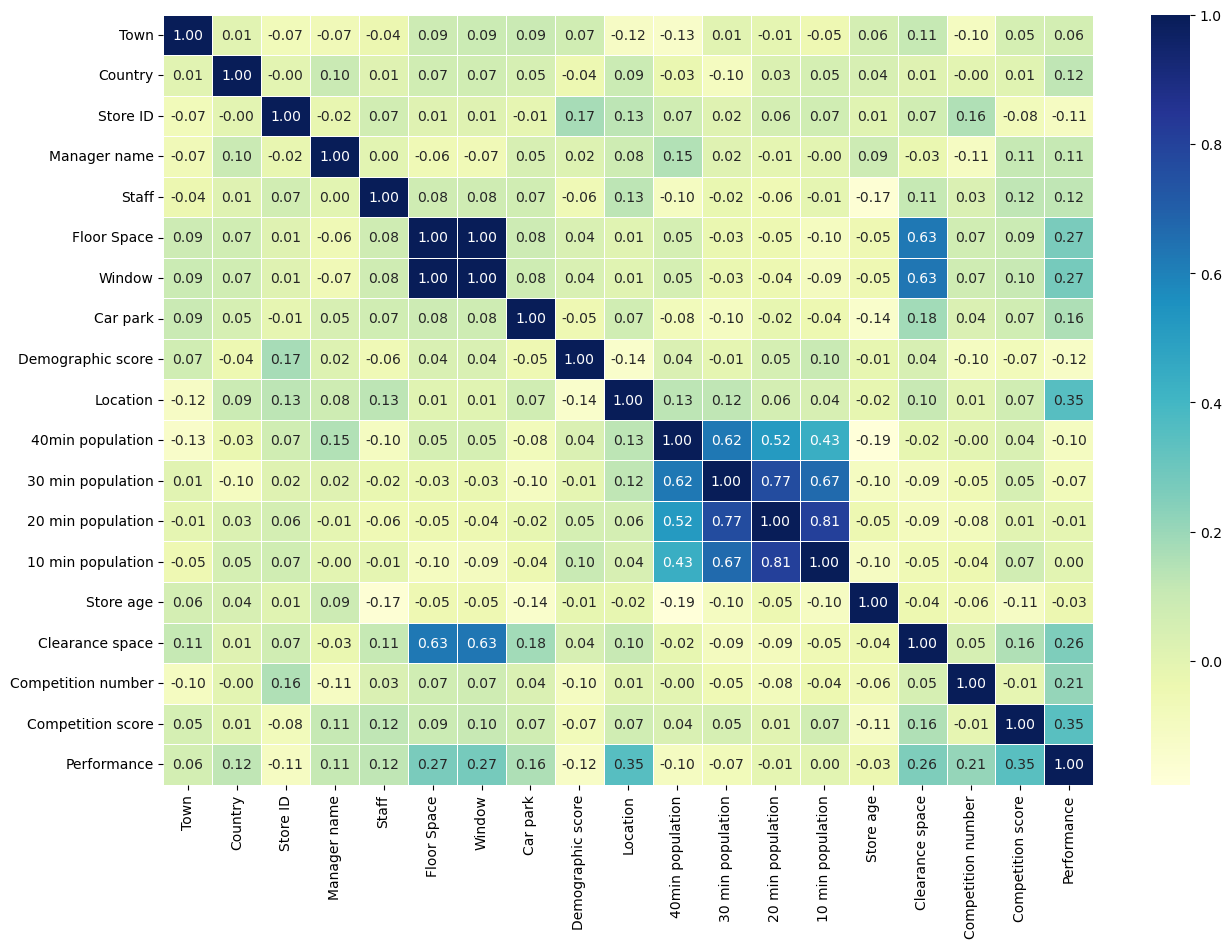

In [19]:
# Lets customize the corr_matrix
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,
                annot = True,
                linewidths=0.5,
                fmt= ".2f",
                cmap="YlGnBu" );

In [20]:
#check missing values
df.isna().sum()

Town                  0
Country               0
Store ID              0
Manager name          0
Staff                 0
Floor Space           0
Window                0
Car park              0
Demographic score     0
Location              0
40min population      0
30 min population     0
20 min population     0
10 min population     0
Store age             0
Clearance space       0
Competition number    0
Competition score     0
Performance           0
dtype: int64

## 4.  Building Model

In [21]:
# Split data into x and y
target = "Performance"
X = df.drop(target, axis = 1)
y = df[target]

In [22]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state = 42, test_size=0.2)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (108, 18)
y_train shape: (108,)
X_test shape: (28, 18)
y_test shape: (28,)


In [23]:
acc_baseline = y_train.value_counts(normalize=True).max()
print("Baseline Accuracy:", round(acc_baseline, 2))

Baseline Accuracy: 0.52


* Now we've got our data split into trainig and test sets, lets build a model
* We'll train (find the patterns) on the training set.
* and we'll test it (use the patterns) on the test set.
 we're going to try 3 different machine learning models:
 1. logistic regression
 2. K-NearestNeigbour
 3. DecisionTreeClassifier

In [24]:
# Put models in a dictionary

# instanciate models in a dictonary 
models = {"Logistic Regression": LogisticRegression(),
          "MLP": MLPClassifier (),
          "Decision Tree": DecisionTreeClassifier()}

# Create a function to fit and score model 
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fit and evaluate given machine learning models.
    model : a dict different sklearn ml model
    X_train : trainig data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : testing labels
    
    """
    # set random seed 
    np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models 
    for name, model in models.items():
        #Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append it's score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [25]:
model_scores = fit_and_score(models = models,
                            X_train = X_train,
                            X_test = X_test,
                            y_train = y_train,
                            y_test = y_test)

model_scores

{'Logistic Regression': 0.4642857142857143,
 'MLP': 0.5714285714285714,
 'Decision Tree': 0.6785714285714286}

In [26]:
# same code with numpy random seed 
np.random.seed(42)
results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    results[model_name] = model.score(X_test, y_test)
    
results

{'Logistic Regression': 0.4642857142857143,
 'MLP': 0.5714285714285714,
 'Decision Tree': 0.6785714285714286}

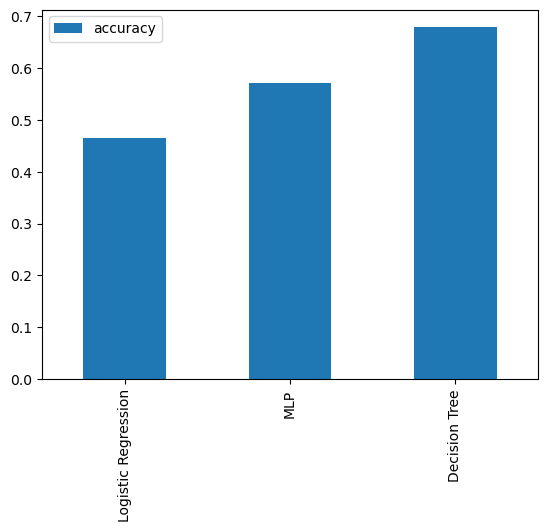

In [27]:
# Visualizing accuracy of each model 
results_df = pd.DataFrame(results.values(), 
                          results.keys(), 
                          columns=["accuracy"])

results_df.plot.bar();

## 5. Experimentation 
> Hyperparameter tuning using RandimizedSearchCV

we're going to tune
* DecisionTreeClassifier()


using RandimizedSearchCV

In [48]:
# Create a hyperparameter grid for Decision Tree
dt_grid = {
    "max_depth": [3, None],
    "min_samples_leaf": np.arange(1, 10),
    "criterion": ["gini", "entropy"]
}


Now we've got hyperparameter grids setup for each of our models, lets tune them using RandomizedSearchCV


In [163]:
# setup random hyperparameter search for a Decision Tree

dt_clf = RandomizedSearchCV(DecisionTreeClassifier(),
                               param_distributions = dt_grid,
                               cv = 5,
                               n_iter = 20,
                               random_state=42,
                               verbose = True, )

# fit random hyperparameter search model for LogisticRegression
dt_clf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_iter=20,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, None],
                                        'min_samples_leaf': array([1, 2, 3, 4, 5, 6, 7, 8, 9])},
                   random_state=42, verbose=True)

In [164]:
# best parameter for our model
dt_clf.best_params_

{'min_samples_leaf': 2, 'max_depth': 3, 'criterion': 'gini'}

In [165]:
# Evaluate the randomized search randomforestclassifier model 
dt_clf.score(X_test, y_test)

0.5357142857142857

In [166]:
# rebuiding model with best parameters for our data 
model = DecisionTreeClassifier(
     min_samples_leaf = 7,
     criterion = 'gini'
)
model.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_leaf=7)

In [172]:
## training and test accuracy scores for the model
acc_train = accuracy_score(y_train, model.predict(X_train))
acc_test = model.score(X_test, y_test)

print("Training Accuracy:", round(acc_train, 2))
print("Test Accuracy:", round(acc_test, 2))

Training Accuracy: 0.88
Test Accuracy: 0.79


In [173]:
# make prediction with tuned model
y_preds = pd.DataFrame(model.predict(X_test))
y_preds[:5]

,0
0,1
1,2
2,2
3,1
4,2


## 6. Evaluate our tuned machine learning classifier, beyond accuracy

* ROC curve and AUC score
* Confusion matrix
* Classification report
* Precision
* Recall
*F1-score 

... and it would be grate if cross-validation was used where possible.


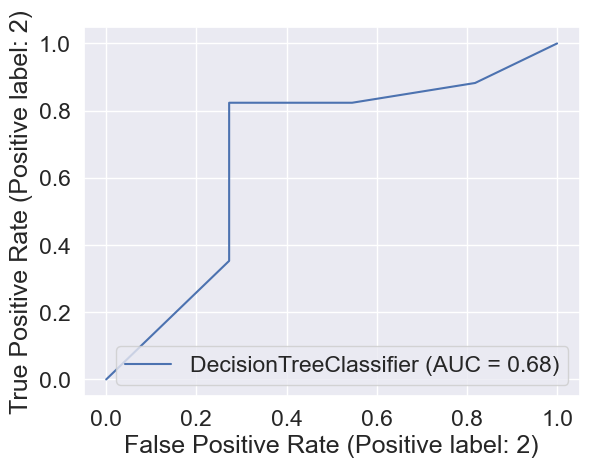

In [190]:
# Plot Roc curve and calculate AUC metric
plot_roc_curve(model, X_test, y_test);

In [191]:
# Confusion matrix
print(confusion_matrix(y_test, y_preds))

[[ 8  3]
 [ 3 14]]


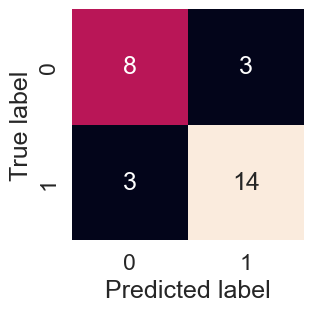

In [192]:
sns.set(font_scale=1.5) # Increase font size
 
def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel("Predicted label") # predictions go on the x-axis
    plt.ylabel("True label") # true labels go on the y-axis 
    
plot_conf_mat(y_test, y_preds)

In [193]:
# Classification Report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           1       0.73      0.73      0.73        11
           2       0.82      0.82      0.82        17

    accuracy                           0.79        28
   macro avg       0.78      0.78      0.78        28
weighted avg       0.79      0.79      0.79        28



### calculate evaluation metrics using cross-validation

we're going to calculate accuracy, precision, recall, f1-score and `cross_val_score()`

In [195]:
# Cross-validated accuracy
cv_acc = cross_val_score(model,
                        X,
                        y,
                        cv= 5,
                        scoring ="accuracy")

cv_acc = np.mean(cv_acc)
cv_acc

0.6253968253968255

In [196]:
# Cross-validated precision
cv_precision = cross_val_score(model,
                        X,
                        y,
                        cv= 5,
                        scoring ="precision")

cv_precision = np.mean(cv_precision)
cv_precision

0.6673122199437989

In [197]:
# Cross-validated recall

cv_recall = cross_val_score(model,
                        X,
                        y,
                        cv= 5,
                        scoring ="recall")

cv_recall = np.mean(cv_recall)
cv_recall

0.6582417582417582

In [198]:
# Cross-validated f1-score
cv_f1 = cross_val_score(model,
                        X,
                        y,
                        cv= 5,
                        scoring ="f1")

cv_f1 = np.mean(cv_f1)
cv_f1

0.6328197165153687

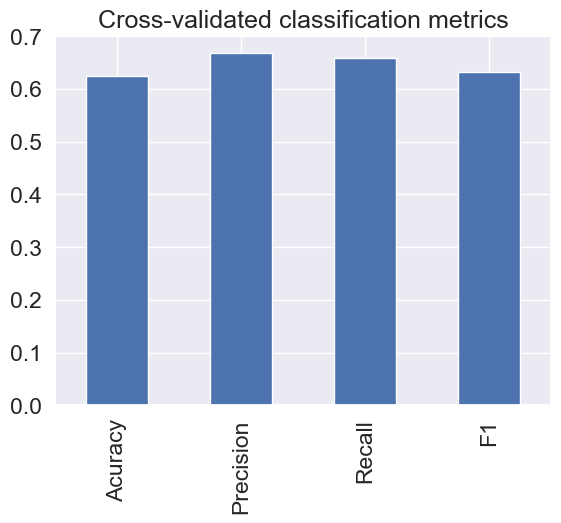

In [199]:
# Visualize cross-validated metrics
cv_metrics = pd.DataFrame ({"Acuracy": cv_acc,
                           "Precision": cv_precision,
                           "Recall": cv_recall,
                           "F1": cv_f1},
                          index = [0])

cv_metrics.T.plot.bar(title = "Cross-validated classification metrics", legend = False);

## 7. Communication


### Plot tree

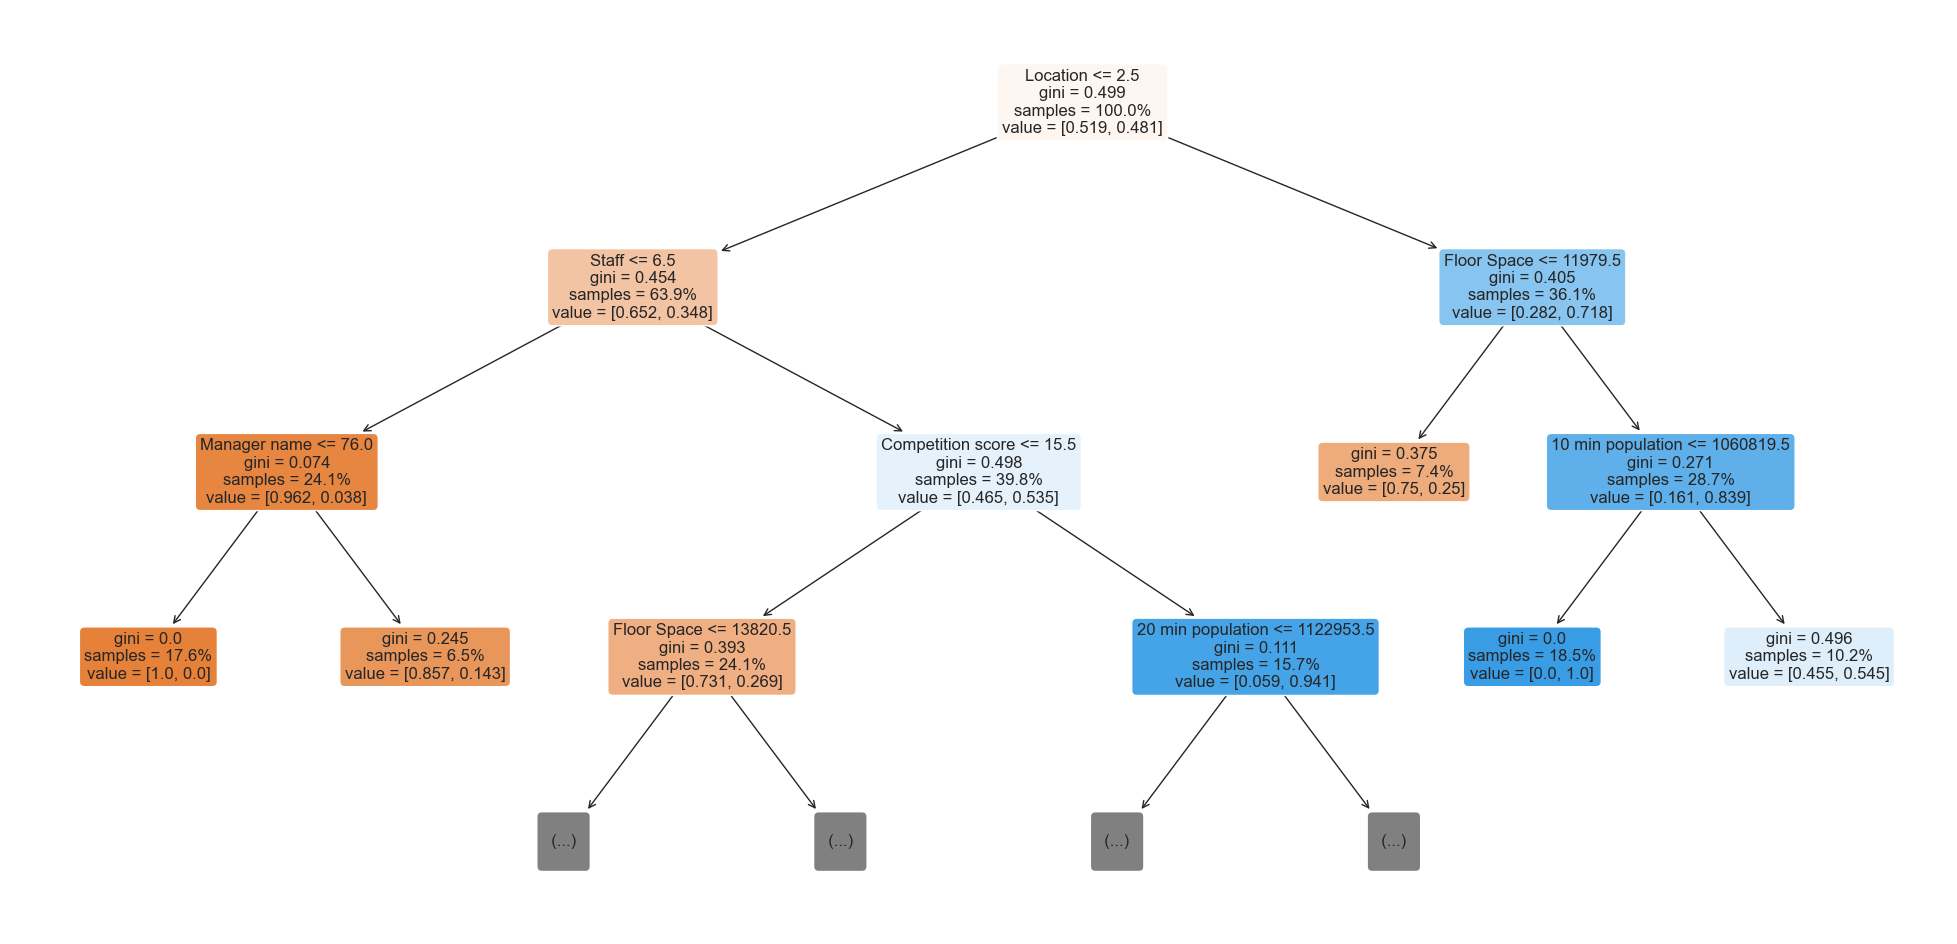

In [202]:
# Create larger figure
fig, ax = plt.subplots(figsize=(25, 12))
# Plot tree
plot_tree(
    decision_tree= model,
    feature_names= X_train.columns,
    filled=True,  # Color leaf with class
    rounded=True,  # Round leaf edges
    proportion=True,  # Display proportion of classes in leaf
    max_depth=3,  # Only display first 3 levels
    fontsize=12,  # Enlarge font
    ax=ax,  # Place in figure axis
);

### Feature Importance

In [176]:
features = X_train.columns
importances = model.feature_importances_

print("Features:", features[:3])
print("Importances:", importances[:3])

Features: Index(['Town', 'Country', 'Store ID'], dtype='object')
Importances: [0. 0. 0.]


In [184]:
feat_imp = pd.Series(importances, index=features).sort_values(ascending = False)[:10]
feat_imp.head()

Competition score    0.256517
Floor Space          0.242676
Staff                0.220693
Location             0.188658
10 min population    0.081042
dtype: float64

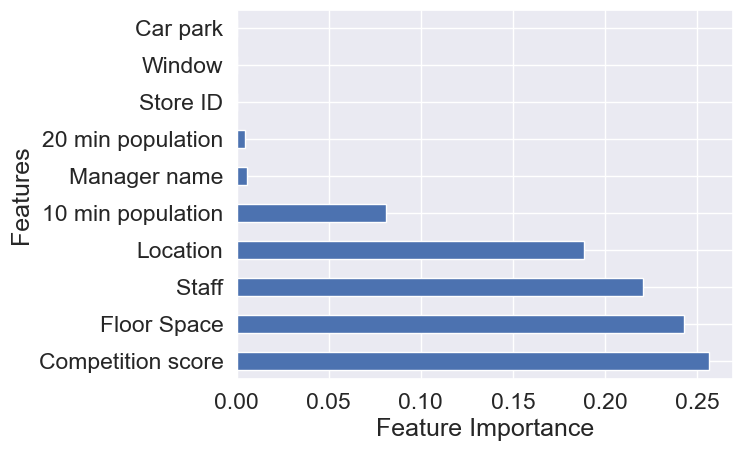

In [201]:
# Create horizontal bar chart
feat_imp.plot(kind="barh")
plt.xlabel("Feature Importance")
plt.ylabel("Features");